James Irwin \
CSC 369 Analysis Code \
02.03.2025

In [1]:
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pyarrow.csv as pv
import pyarrow as pa
import pandas as pd
import polars as pl
import duckdb
import time
import sys

**1. Most Painted Pixels**

In [2]:
print(duckdb.sql(f'''
SELECT x, y, count(*) AS "num_placements"
FROM '../assignment3/rplace.parquet'     
GROUP BY x, y
ORDER BY "num_placements" DESC
LIMIT 3
''').df())

     x    y  num_placements
0    0    0           98807
1  359  564           69198
2  349  564           55230


**2. Most Common Color at Each Pixel**

In [8]:
df1 = duckdb.sql(f'''
SELECT
CASE
    WHEN pixel_color = '#FFFFFF' THEN 'white'
    WHEN pixel_color = '#000000' THEN 'black'
    WHEN pixel_color = '#FF4500' THEN 'orange'
    WHEN pixel_color = '#811E9F' THEN 'purple'
    WHEN pixel_color = '#BE0039' THEN 'red'
    WHEN pixel_color = '#51E9F4' THEN 'teal'  
    WHEN pixel_color = '#3690EA' THEN 'blue'    
    ELSE pixel_color
END AS pixel_color, 
x, y, num_placements, rank                 
FROM (
    SELECT pixel_color, x, y, count(*) AS "num_placements", ROW_NUMBER() OVER (PARTITION BY (x, y) ORDER BY "num_placements" DESC) AS "rank"
    FROM '../assignment3/rplace.parquet'  
    WHERE (x = 0 AND y = 0)
    OR (x = 359 AND y = 564)
    OR (x = 349 AND y = 564)             
    GROUP BY pixel_color, x, y
    ORDER BY "num_placements" DESC
) 
WHERE rank <= 5
ORDER BY x, y, num_placements DESC
''').df()

print(df1)

   pixel_color    x    y  num_placements  rank
0        white    0    0           59282     1
1        black    0    0            8715     2
2       orange    0    0            4209     3
3       purple    0    0            2200     4
4          red    0    0            2189     5
5        black  349  564           27804     1
6         teal  349  564           19404     2
7       orange  349  564            2120     3
8        white  349  564            1512     4
9          red  349  564             846     5
10       black  359  564           34726     1
11        teal  359  564           26940     2
12      orange  359  564            1656     3
13       white  359  564            1391     4
14        blue  359  564             860     5


In [9]:
x1 = df1.loc[[0,1,2,3,4], "pixel_color"]
x2 = df1.loc[[5,6,7,8,9], "pixel_color"]
x3 = df1.loc[[10,11,12,13,14], "pixel_color"]

y1 = df1.loc[[0,1,2,3,4], "num_placements"]
y2 = df1.loc[[5,6,7,8,9], "num_placements"]
y3 = df1.loc[[10,11,12,13,14], "num_placements"]

Text(0.5, 1.0, 'Pixel 3: (349, 564)')

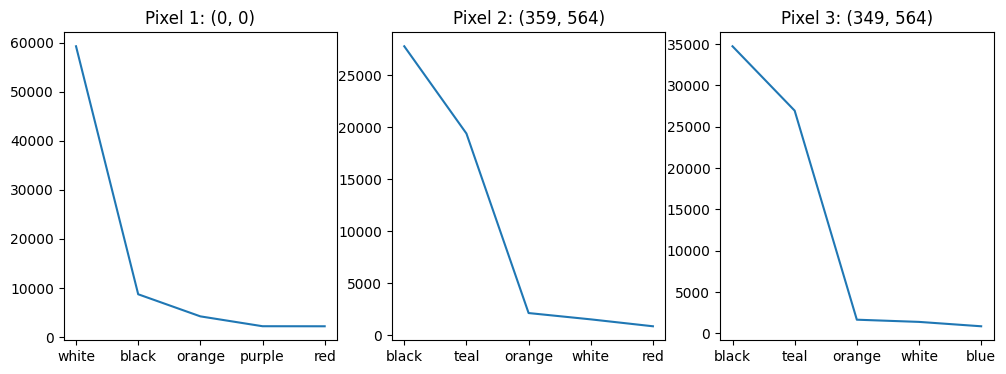

In [11]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 3, 1)
plt.plot(x1, y1)
plt.title('Pixel 1: (0, 0)')

plt.subplot(1, 3, 2)
plt.plot(x2, y2)
plt.title('Pixel 2: (359, 564)')

plt.subplot(1, 3, 3)
plt.plot(x3, y3)
plt.title('Pixel 3: (349, 564)')


**3. What Percent of Users at (0, 0) were First-Time Users?**

In [50]:
# count first-time users who placed (0,0) 
print(duckdb.sql(f'''
WITH huh AS (
    SELECT user_id, min(timestamp) AS "first_time"
    FROM '../assignment3/rplace.parquet' 
    GROUP BY user_id          
), 
ahh AS (
    SELECT *
    FROM '../assignment3/rplace.parquet'                
)
SELECT count(*)
FROM huh              
JOIN ahh ON huh.user_id = ahh.user_id
WHERE x = 0
AND y = 0
AND ahh.timestamp = huh.first_time            
''').df()) 

   count_star()
0          8414


In [51]:
# count total users who placed (0,0)
print(duckdb.sql(f'''
SELECT count (DISTINCT user_id)
FROM '../assignment3/rplace.parquet'
WHERE x = 0
AND y = 0
''').df()) 

   count(DISTINCT user_id)
0                    83906


In [4]:
print(duckdb.sql(f'''
SELECT count (DISTINCT user_id)
FROM '../assignment3/rplace.parquet'
''').df()) 

   count(DISTINCT user_id)
0                 10381144


In [53]:
print(8414/83906)

0.10027888351250208
